In [1]:
import numpy as np
import csv

import matplotlib.pyplot as plt
#import matplotlib.rc

In [2]:
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22


because ive formatted the data like an idiot, needs to be done like this

In [3]:
run121314 = '12_13_14-0625'
run050609 = '05_06_09-0625'
run222324 = '22_23_24-0625'

In [4]:
# cause it broke, heres the explicit FOM for 19-20-21-0625

FOMR192021 = [1.0, 1.0130260396213573, 1.3548682363941684, 1.8614696080724742, 1.7423328952709374, 1.3021500443024954, 0.604716548668491, 0.22126181883595103, 0.12090929763007183, 0.06939174004427305, 5.065626600901878e-05]
FOMERR_192021 = [0.015557273704321056, 0.015816048950443543, 0.02180188280161052, 0.03365038997905279, 0.04361453614148453, 0.062057832303381515, 0.05466539903412506, 0.038806405788481255, 0.042834011847478266, 0.03074882178837897, 7.164120657110411e-05]
blob_2E_10 = np.linspace(0,0.5, 11)
print(len(FOMR192021))
print(len(FOMERR_192021))

11
11


In [5]:
def read_fom(run, N):

    '''
    N being the number of steps int he FOM calc
    51 or 31, for 0.5 and 0.3 usually
    '''

    with open(f'data/FOM-{run}.csv', 'r') as file:
        reader = csv.reader(file)
        data = list(reader)

    def split_list(data, n):
        return [data[i:i + n] for i in range(0, len(data), n)]


    N = 51  # Define the number of elements per split, 0.3MeV in 0.01 increments -> 31
    split_data = split_list(data, N)

    #print(split_data[1])

    x, y = zip(*split_data[0])
    blob_2E = [float(q) for q in x ]
    FOM = [float(q) for q in y ]

    _, fom_err = zip(*split_data[1])
    fom_err = [float(q) for q in fom_err ]
    #print(fom_err)

    return blob_2E, FOM, fom_err

In [6]:
N = 51
blob_2E, FOMR121314, FOMERR_121314 = read_fom(run121314, N)
blob_2E, FOMR050609, FOMERR_050609 = read_fom(run050609, N)
blob_2E, FOMR222324, FOMERR_222324 = read_fom(run222324, N)

In [7]:
# X-values (Blob cut in keV), estimated in steps of about 20 keV
x_data_NEW = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]
x_data_NEW = [x / 1000 for x in x_data_NEW]
# Y-values (f.o.m), estimated from the plot for the 'Data' (blue squares)
y_data_NEW = [1.0, 1.05, 1.10, 1.15, 1.23, 1.32, 1.42, 1.55, 1.68, 1.80, 1.95, 2.10, 2.20, 2.42, 2.60, 2.70, 2.85, 2.90, 3.00, 2.92, 2.85, 2.70, 2.53, 2.35, 2.10, 1.85, 1.58, 1.35, 1.15, 1.05, 1.00]


y_classical = [1.0, 1.02, 1.05, 1.07, 1.11, 1.15, 1.20, 1.23, 1.28, 1.32, 1.36, 1.39, 1.42, 1.46, 1.48, 1.50, 1.52, 1.54, 1.56, 1.54, 1.51, 1.48, 1.45, 1.40, 1.33, 1.26, 1.20, 1.15, 1.10, 1.05, 1.02, 1.00]
x_classical = np.linspace(0, 0.44, 32, endpoint = True)

In [8]:
print(blob_2E[:-1])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49]


/tmp/ipykernel_15203/1654416103.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_data_NEW, y_data_NEW, 'o-', label='Beersheba - NEW', linestyle='dashed', color = 'red')
/tmp/ipykernel_15203/1654416103.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_classical, y_classical, 'o-', label='Classical - NEW', linestyle='dotted', color = 'green')
/tmp/ipykernel_15203/1654416103.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, FOMR121314, fmt = 'o-', yerr=FOMERR_121314, capsize = 2, label = f'Beersheba - NEXT100', linestyle = 'solid', color  = 'tab:blue')


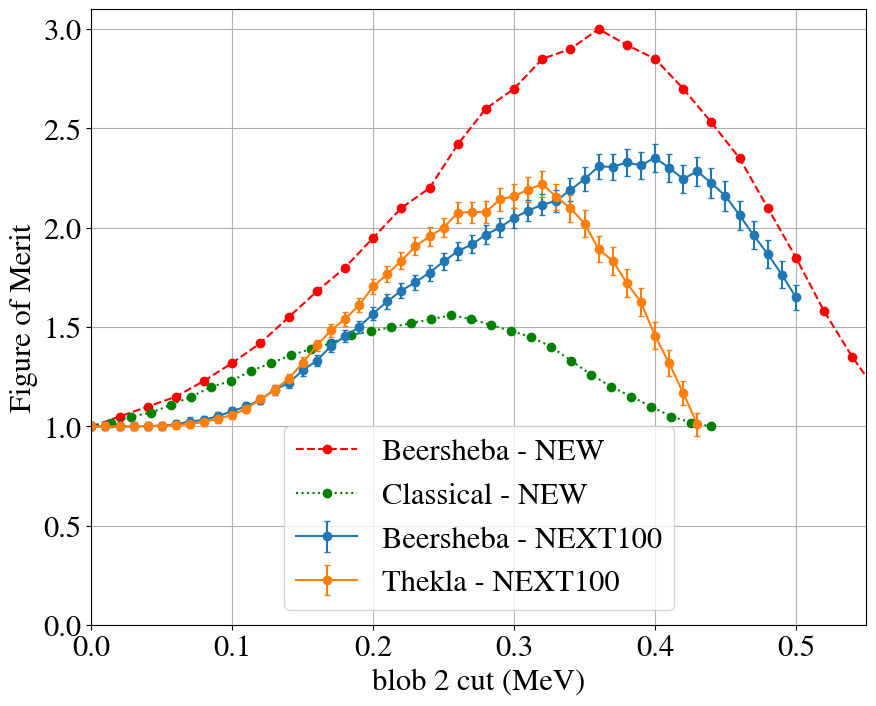

In [9]:
plt.plot(x_data_NEW, y_data_NEW, 'o-', label='Beersheba - NEW', linestyle='dashed', color = 'red')
plt.plot(x_classical, y_classical, 'o-', label='Classical - NEW', linestyle='dotted', color = 'green')
plt.errorbar(blob_2E, FOMR121314, fmt = 'o-', yerr=FOMERR_121314, capsize = 2, label = f'Beersheba - NEXT100', linestyle = 'solid', color  = 'tab:blue')
#plt.errorbar(blob_2E, FOMR050609, yerr=FOMERR_050609, label = f'Beersheba - No blob changes', linestyle = 'dashdot')
plt.errorbar(blob_2E[:-7], FOMR222324[:-7], yerr=FOMERR_222324[:-7], label = f'Thekla - NEXT100', color = 'tab:orange', fmt = 'o-', capsize = 2)
#plt.errorbar(blob_2E_10, FOMR192021, yerr=FOMERR_192021, label = f'Thekla - No blob changes')


#plt.title(f'FOM')
plt.xlabel('blob 2 cut (MeV)')
plt.ylabel('Figure of Merit')
plt.grid()
plt.xlim([0, 0.55])
plt.ylim([0, 3.1])
plt.legend()
plt.show()

In [14]:
print(max(FOMR121314))
print(np.argmax(FOMR121314))
print(FOMR121314)
print(FOMERR_121314[40])

2.3529549057409267
40
[1.0, 1.0, 1.0, 0.9999511697284179, 1.001602104842301, 1.0041850473686886, 1.0109227550125348, 1.0250408643725837, 1.0329829654922338, 1.0528344381194064, 1.0768536592298736, 1.1020932326559938, 1.134511661165471, 1.1851332676974078, 1.2185447250135062, 1.2831009652496426, 1.3312663080434755, 1.405527570744506, 1.454076551703267, 1.500477761783505, 1.5685708047145737, 1.629495316935817, 1.6841042557472437, 1.7257048056711612, 1.7746115297076792, 1.83039628195138, 1.8817698177279711, 1.9163871626699989, 1.9656188489274091, 2.0014630609515427, 2.050187600816667, 2.0865477629391225, 2.1160269161347154, 2.1361534457105935, 2.1905157863000095, 2.245384617211626, 2.3088829580613703, 2.3064680055583757, 2.3288131052208674, 2.3139256354035984, 2.3529549057409267, 2.3005989164255634, 2.245978862952847, 2.284370333051673, 2.2242331688531993, 2.1600780953045238, 2.06304457045066, 1.9616420997825035, 1.8674424983772653, 1.7641672672509032, 1.6492373406137188]
0.07099220050550

In [16]:
print(max(FOMR222324))
print(np.argmax(FOMR222324))
print(FOMERR_222324)
print(FOMERR_222324[32])

2.220669926245429
32
[0.01997304844788408, 0.019975094611419535, 0.019974364556034605, 0.01999984352004241, 0.020021577385640657, 0.020066904833521755, 0.02012683131622283, 0.02027767596326287, 0.020513044877141215, 0.02088016632277987, 0.021316737337004506, 0.022026133934775167, 0.023081862713318555, 0.02418625238702587, 0.025595857830833717, 0.027495227924391446, 0.029648853455091394, 0.03160792016297947, 0.03336340370632313, 0.03543176080208842, 0.03814129844441188, 0.04015334493031659, 0.042338127523783894, 0.04491029439459794, 0.04691927881999166, 0.048821275611191615, 0.05185548852181306, 0.05292515518199337, 0.053948417021997694, 0.05722407445363642, 0.059409646914158426, 0.062376636990587424, 0.06597917195575018, 0.06613630964346544, 0.06738420038076157, 0.06797011048634828, 0.0663780921691505, 0.06894128243209527, 0.06926895005712619, 0.07043946169683385, 0.06713693383987861, 0.06576330772165244, 0.06274349597122923, 0.05834363609840182, 0.05176208096137014, 0.0460634958574580

In [18]:
print(max(y_classical))

1.56


In [14]:
#print(max(FOM))
#print(blob_2E[FOM.index(max(FOM))])

# differing plots

### 15116 pre changes

In [33]:
run_310525 = '15116_310525'

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]
[1.0, 1.0, 1.0007471666546592, 1.0178275899838063, 1.050925478308977, 1.1036149975704417, 1.1851034302330832, 1.3017091696020444, 1.4107826075850842, 1.4742535718694942, 1.5190612357286535, 1.525273229195724, 1.5173605147876523, 1.509922694224135, 1.4694457341137994, 1.4146028712465033, 1.401348001105153, 1.375813244198929, 1.3609416268660917, 1.3284132150693204, 1.2976527258480413, 1.2341639062816265, 1.1450402753380164, 1.0885227470854302, 1.0287634281858344, 1.004283352858267, 0.9344255324015521, 0.8429361751524647, 0.7681536677694407, 0.711237981510263, 0.44234783930053]
[1.0, 1.0, 1.0007471666546592, 1.0178275899838063, 1.050925478308977, 1.1036149975704417, 1.1851034302330832, 1.3017091696020444, 1.4107826075850842, 1.4742535718694942, 1.5190612357286535, 1.525273229195724, 1.5173605147876523, 1.5099

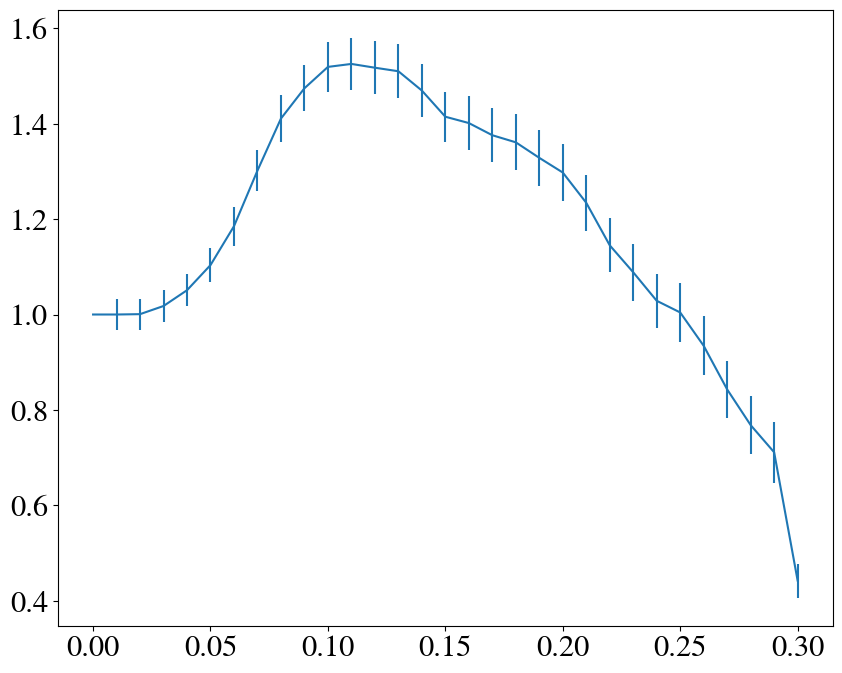

In [34]:
# read in the original data and the errors

with open(f'data/FOM-{run_310525}.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

blob_2E = [float(q[0]) for q in data]

FOM = [float(q[1]) for q in data]
print(blob_2E)
print(FOM)

# errors need to be taken by extracting this array from the FOM lol
with open(f'data/FOM-{run_310525}_err.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

FOM_err = [float(q[1]) for q in data]
FOM_err.insert(0, 1.0)
print(FOM)
print(len(FOM))
print(len(FOM_err))
FOM_err = [abs(x - y) for x,y in zip(FOM, FOM_err)]


print(len(FOM_err))
plt.errorbar(blob_2E, FOM, yerr = FOM_err)
plt.show()

/tmp/ipykernel_20624/159582172.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, FOM, yerr = FOM_err, fmt = 'o-', capsize = 2, linestyle = 'dashed')


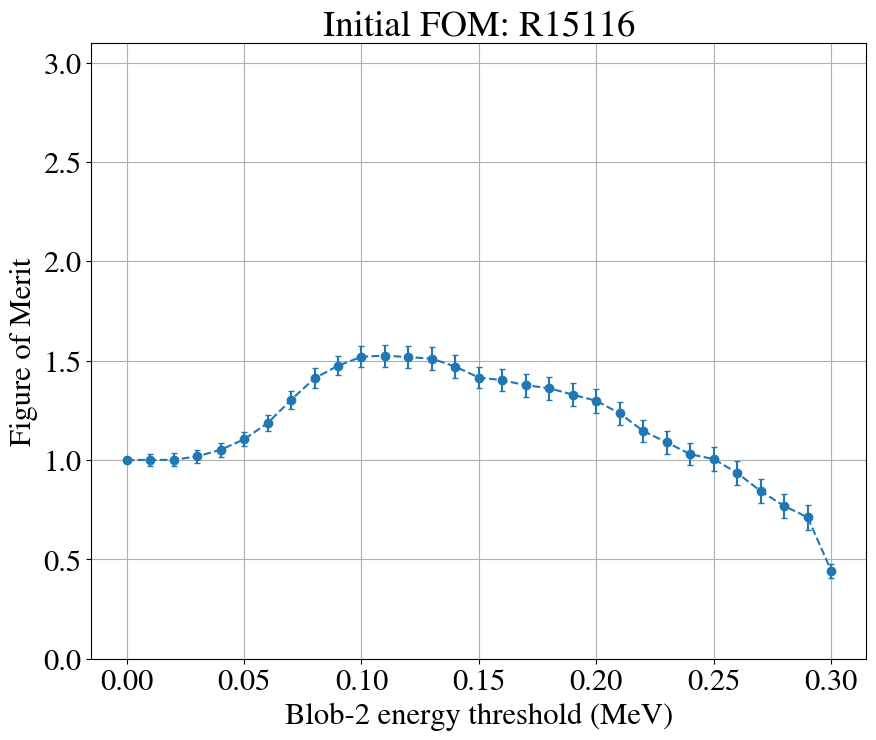

In [36]:
plt.errorbar(blob_2E, FOM, yerr = FOM_err, fmt = 'o-', capsize = 2, linestyle = 'dashed')
plt.xlabel('Blob-2 energy threshold (MeV)')
plt.ylabel('Figure of Merit')
plt.title('Initial FOM: R15116')
plt.ylim([0, 3.1])

plt.grid()

### COMBINATION OF BEFORE AND AFTER

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]
[1.0, 1.0, 1.0007471666546592, 1.0178275899838063, 1.050925478308977, 1.1036149975704417, 1.1851034302330832, 1.3017091696020444, 1.4107826075850842, 1.4742535718694942, 1.5190612357286535, 1.525273229195724, 1.5173605147876523, 1.509922694224135, 1.4694457341137994, 1.4146028712465033, 1.401348001105153, 1.375813244198929, 1.3609416268660917, 1.3284132150693204, 1.2976527258480413, 1.2341639062816265, 1.1450402753380164, 1.0885227470854302, 1.0287634281858344, 1.004283352858267, 0.9344255324015521, 0.8429361751524647, 0.7681536677694407, 0.711237981510263, 0.44234783930053]
[1.0, 1.0, 1.0007471666546592, 1.0178275899838063, 1.050925478308977, 1.1036149975704417, 1.1851034302330832, 1.3017091696020444, 1.4107826075850842, 1.4742535718694942, 1.5190612357286535, 1.525273229195724, 1.5173605147876523, 1.5099

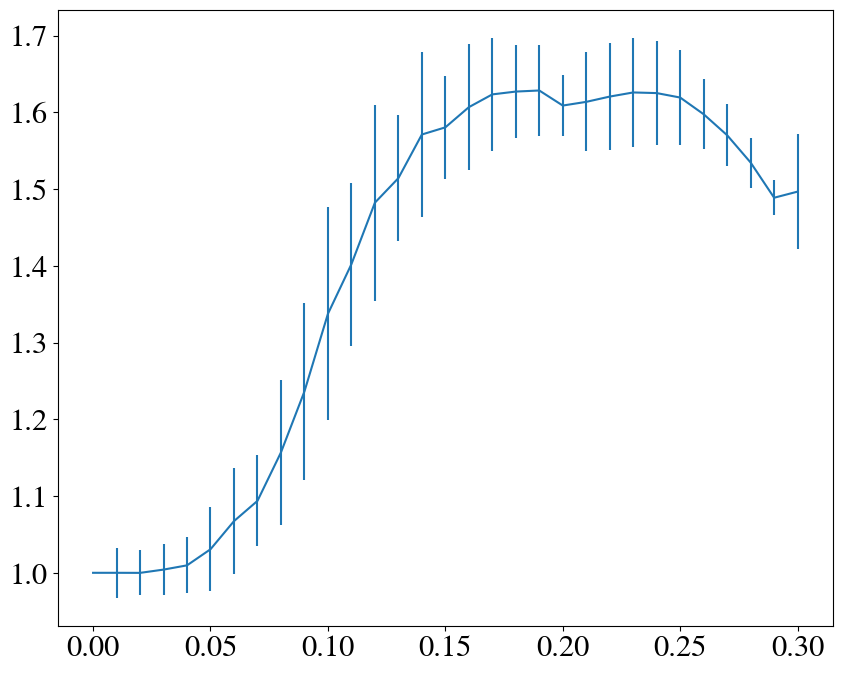

In [38]:
# read in the original data and the errors
run_050625 = '15116_050625'
with open(f'data/FOM-{run_050625}.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

blob_2E = [float(q[0]) for q in data]

FOM_050625 = [float(q[1]) for q in data]
print(blob_2E)
print(FOM)

# errors need to be taken by extracting this array from the FOM lol
with open(f'data/FOM-{run_050625}_err.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

FOM_err_050625 = [float(q[1]) for q in data]
FOM_err_050625.insert(0, 1.0)
print(FOM)
print(len(FOM))
print(len(FOM_err))
FOM_err_050625 = [abs(x - y) for x,y in zip(FOM_050625, FOM_err_050625)]

plt.errorbar(blob_2E, FOM_050625, yerr = FOM_err_050625)
plt.show()

/tmp/ipykernel_20624/2924602337.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, FOM, yerr = FOM_err, fmt = 'o-', capsize = 2, linestyle = 'dashed', label = 'Before fit changes')
/tmp/ipykernel_20624/2924602337.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, FOM_050625, yerr = FOM_err_050625, fmt = 'o-', capsize = 2, linestyle = 'dotted', label = 'After fit changes')


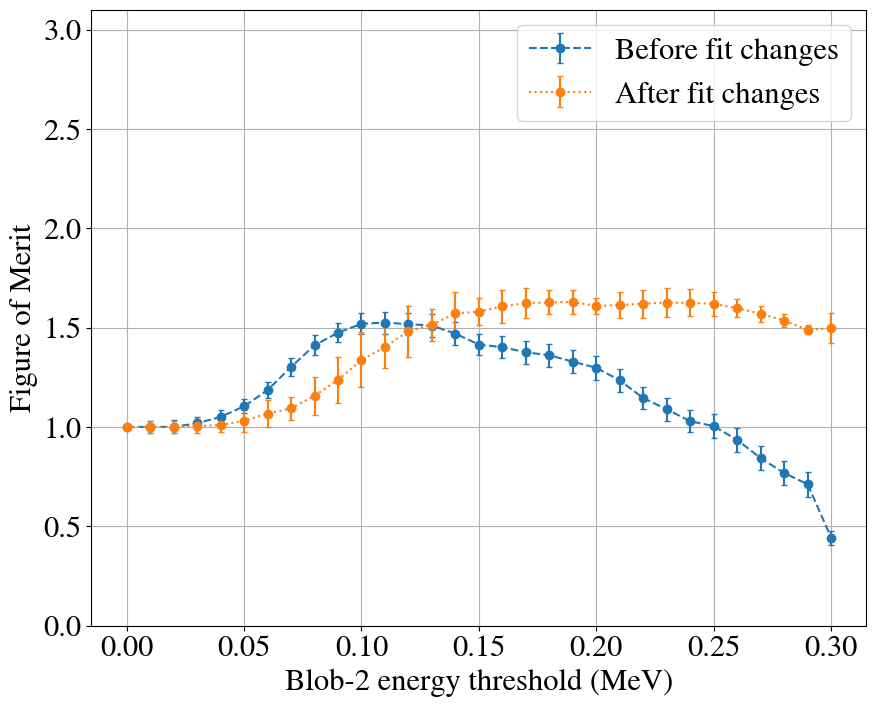

In [40]:
plt.errorbar(blob_2E, FOM, yerr = FOM_err, fmt = 'o-', capsize = 2, linestyle = 'dashed', label = 'Before fit changes')
plt.errorbar(blob_2E, FOM_050625, yerr = FOM_err_050625, fmt = 'o-', capsize = 2, linestyle = 'dotted', label = 'After fit changes')
plt.xlabel('Blob-2 energy threshold (MeV)')
plt.ylabel('Figure of Merit')
plt.ylim([0, 3.1])
plt.legend()
plt.grid()

### 15152, 15153, 15116 fit

05, 06, 09-0625

/tmp/ipykernel_20624/2585679539.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, FOMR050609, yerr = FOMERR_050609, fmt = 'o-', capsize = 2, linestyle = 'dashed')


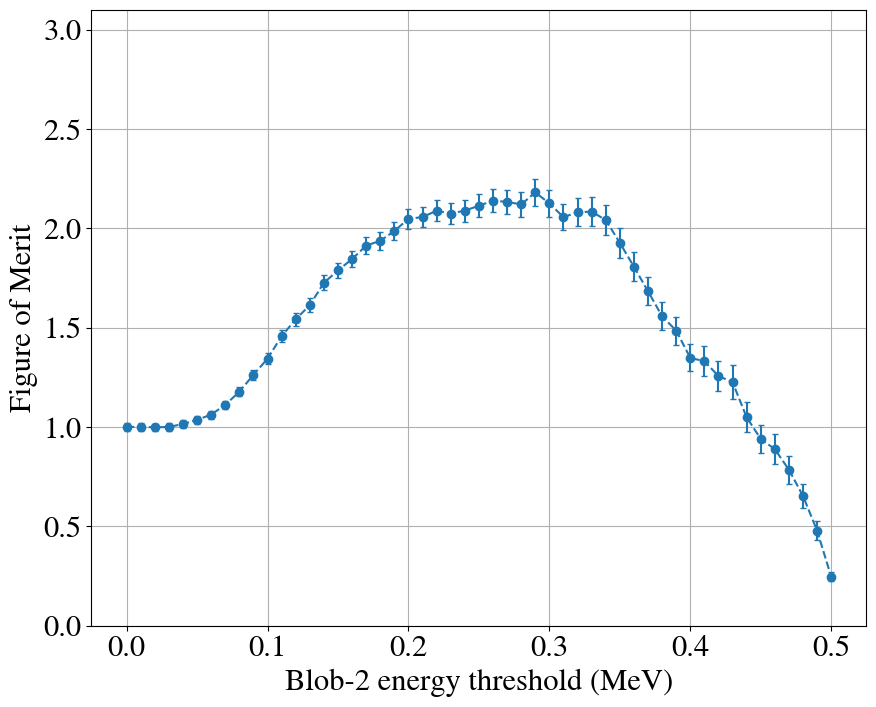

In [43]:
plt.errorbar(blob_2E, FOMR050609, yerr = FOMERR_050609, fmt = 'o-', capsize = 2, linestyle = 'dashed')
plt.xlabel('Blob-2 energy threshold (MeV)')
plt.ylabel('Figure of Merit')
plt.ylim([0, 3.1])
plt.grid()
plt.show()

### 15152, 15153, 15116
120625, 130625, 140625

blob-beersheba combo

/tmp/ipykernel_20624/535187997.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, FOMR121314, yerr=FOMERR_121314, fmt = 'o-', capsize = 2, linestyle = 'dotted', label = 'After blob changes')
/tmp/ipykernel_20624/535187997.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, FOMR050609, yerr = FOMERR_050609, fmt = 'o-', capsize = 2, linestyle = 'dashed', label = 'Before blob changes')


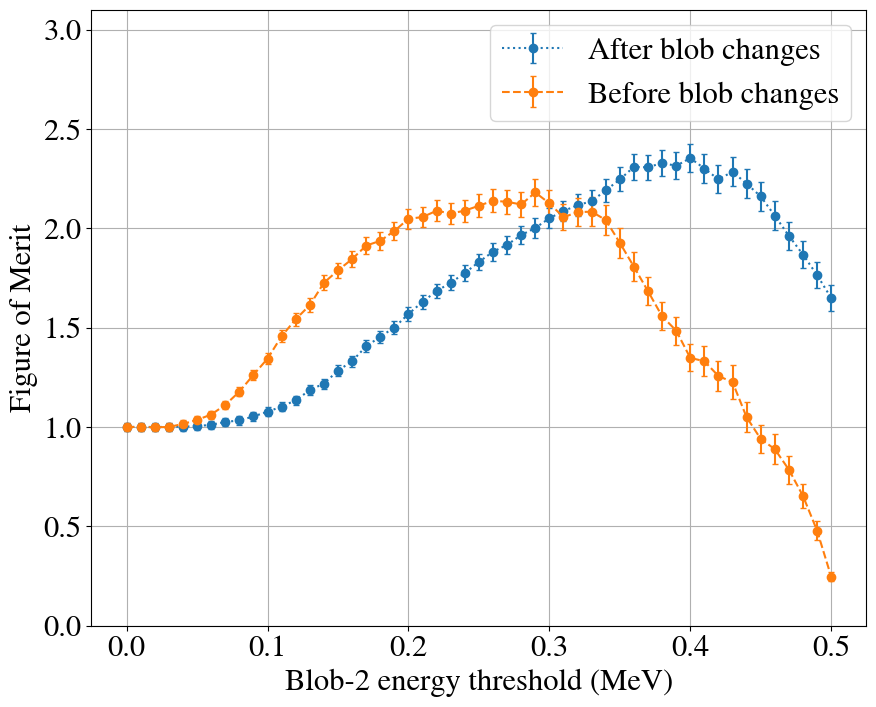

In [44]:
plt.errorbar(blob_2E, FOMR121314, yerr=FOMERR_121314, fmt = 'o-', capsize = 2, linestyle = 'dotted', label = 'After blob changes')
plt.errorbar(blob_2E, FOMR050609, yerr = FOMERR_050609, fmt = 'o-', capsize = 2, linestyle = 'dashed', label = 'Before blob changes')
plt.xlabel('Blob-2 energy threshold (MeV)')
plt.ylabel('Figure of Merit')
plt.ylim([0, 3.1])
plt.legend()
plt.grid()

### MC pre all of this

/tmp/ipykernel_30007/1793806725.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(blob_2E, MCfom, yerr = MCfom_err, fmt = 'o-', capsize = 2, linestyle = 'dashed')


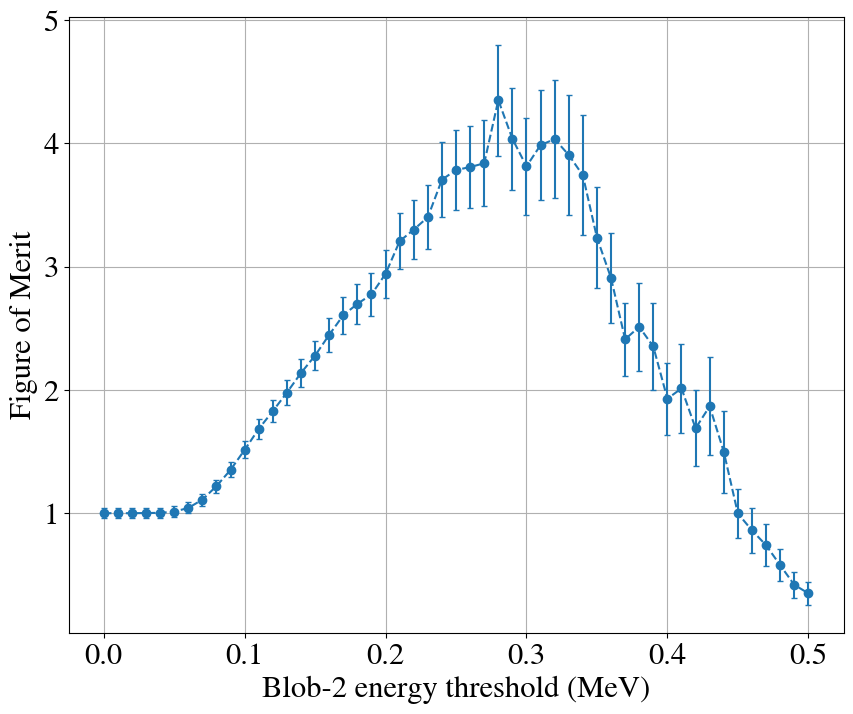

In [23]:
MCfom = [1.0, 1.0, 1.0, 1.001299615957384, 1.0028204762250155, 1.012912356228032, 1.04238433563304, 1.1101154884701494, 1.2197457401397065, 1.351666617966876, 1.5140185805088764, 1.68397972330659, 1.8281684299766539, 1.9784449294695334, 2.1376346262050294, 2.278834748953559, 2.446917903805626, 2.6057741466724718, 2.6979172992023783, 2.7742107740604456, 2.9416032617156476, 3.2059474634856433, 3.30018474843157, 3.4006630354216654, 3.70504774270174, 3.783333414534133, 3.8071694612741713, 3.8379091601938957, 4.350317571807131, 4.0366425944543245, 3.812764864121319, 3.9856723793227173, 4.033709575696585, 3.90519124371912, 3.740309979245547, 3.2351014264468008, 2.907540998702441, 2.410693184808779, 2.5111967782660694, 2.3519799244839987, 1.927941154494331, 2.012567881231401, 1.6889357620662853, 1.8669232822095758, 1.498759709823118, 0.9977596857989619, 0.8610942630338698, 0.7405695669735037, 0.5789410528415598, 0.4195652191924035, 0.35026425165227154]
MCfom_err = [0.04237018190810798, 0.04237018190810798, 0.04237018190810798, 0.04246178683408545, 0.04256846583660044, 0.043053811374853965, 0.044499615600903014, 0.04777057517427669, 0.05328993093257232, 0.06023824798830746, 0.06926437547976803, 0.07919430712642944, 0.08850534188892825, 0.09861455605398434, 0.11015365229645506, 0.12136398987195965, 0.1358931068277607, 0.15081886280582288, 0.16166924104967925, 0.1717895244575419, 0.19283280387577667, 0.2256762549157359, 0.24001465604373365, 0.2576395877562905, 0.302809847048524, 0.3224415774612675, 0.33381711820154, 0.34904743097254043, 0.4496077089964473, 0.41405822102500917, 0.39379442674341597, 0.44759920768772893, 0.48001233518620706, 0.48402216421636995, 0.48716002600764097, 0.40903903184779933, 0.3686344100427595, 0.29603058154881967, 0.35770512017027045, 0.3526755981525951, 0.28998864938032487, 0.36203768978655154, 0.3067220781733115, 0.3990180127346698, 0.33128197702280743, 0.19699568189255365, 0.184307997871122, 0.17067671541401566, 0.1319390239968462, 0.10525612260383452, 0.09208445725419058]
plt.errorbar(blob_2E, MCfom, yerr = MCfom_err, fmt = 'o-', capsize = 2, linestyle = 'dashed')
plt.xlabel('Blob-2 energy threshold (MeV)')
plt.ylabel('Figure of Merit')
plt.title('')
plt.grid()
